## Data Cleaning

In [74]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns

### Movie Budgets

In [75]:
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
print(movie_budgets.shape)
movie_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [76]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Here we can see that our values for production budget, domestic gross, and worldwide gross are being read as objects rather than numbers, and our release date isn't being represented as a date time object

In [77]:
movie_budgets['production_budget'] = (movie_budgets['production_budget']
                                      .str.replace(',', '')
                                      .str.replace('$', '')
                                      .astype(float))

movie_budgets['domestic_gross'] = (movie_budgets['domestic_gross']
                                   .str.replace(',', '')
                                   .str.replace('$', '')
                                   .astype(float))

movie_budgets['worldwide_gross'] = (movie_budgets['worldwide_gross']
                                    .str.replace(',', '')
                                    .str.replace('$', '')
                                    .astype(float))

In [78]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [79]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### The Movie Database

In [80]:
the_movieDB = pd.read_csv('Data/tmdb.movies.csv', index_col=0)
print(the_movieDB.shape)
the_movieDB.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [81]:
the_movieDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


Here we can again see that our release date isn't properly treated as a date time object. Additionally the genre IDs will be more useful as a list of columns rather than strings

In [82]:
the_movieDB['genre_ids'] = the_movieDB['genre_ids'].str.strip('[]').str.split(',')

In [83]:
the_movieDB['release_date'] = pd.to_datetime(the_movieDB['release_date'])

In [84]:
the_movieDB.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


## Data Understanding

In [85]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


<AxesSubplot:ylabel='Frequency'>

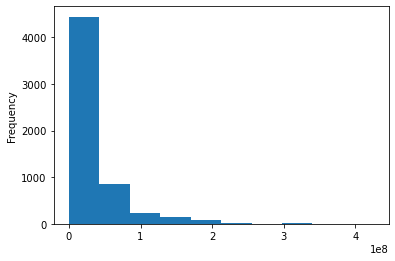

In [90]:
movie_budgets.production_budget.plot(kind='hist')

In [91]:
the_movieDB.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<AxesSubplot:ylabel='Frequency'>

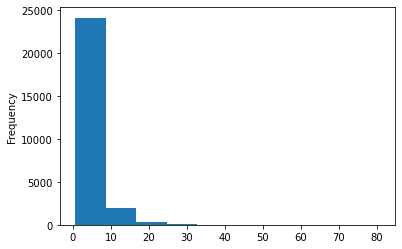

In [93]:
the_movieDB.popularity.plot(kind='hist')

In [92]:
the_movieDB.sort_values(by='popularity', ascending=False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1
13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1
13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1
13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,2014-02-13,Unleashed! A Dog Dancing Story,5.0,1


In [120]:
set([x.strip(' ') for x in most_popular.genre_ids.sum()])

{'10402',
 '10749',
 '10751',
 '12',
 '14',
 '16',
 '18',
 '28',
 '35',
 '53',
 '80',
 '878',
 '9648'}

In [112]:
# popularity, genres
col_names = ['title', 'genre_ids', 'popularity']
most_popular = the_movieDB.query('popularity > 35')[col_names].copy()
most_popular

,title,genre_ids,popularity
2468,Thor,"[12, 14, 28]",38.068
5179,The Avengers,"[878, 28, 12]",50.289
11019,John Wick,"[28, 53]",78.123
11020,The Hobbit: The Battle of the Five Armies,"[28, 12, 14]",53.783
11021,Guardians of the Galaxy,"[28, 878, 12]",49.606
11022,X-Men: Days of Future Past,"[28, 12, 14, 878]",41.867
11023,The Maze Runner,"[28, 9648, 878, 53]",36.955
11024,Big Hero 6,"[12, 10751, 16, 28, 35]",36.920
14169,Avengers: Age of Ultron,"[28, 12, 878]",44.383
14170,Big Hero 6,"[12, 10751, 16, 28, 35]",36.920


In [111]:
genre_popularities = {}

for index, row in most_popular.iterrows():
    for genre in row[0]:
        if genre not in genre_popularities.keys():
            genre_popularities[genre] = [row[1]]
        else:
            genre_popularities[genre].append(row[1])

pd.DataFrame(genre_popularities)

ValueError: arrays must all be same length

In [110]:
genre_popularities

{'12': [38.068000000000005,
  36.92,
  36.92,
  39.137,
  80.773,
  48.508,
  40.095,
  39.975],
 ' 14': [38.068000000000005,
  53.783,
  41.867,
  39.293,
  43.45,
  80.773,
  48.056999999999995,
  44.14,
  43.45,
  40.095,
  38.102],
 ' 28': [38.068000000000005,
  50.288999999999994,
  36.92,
  36.92,
  39.137,
  48.571000000000005,
  45.253,
  80.773,
  48.571000000000005,
  44.007,
  39.975],
 '878': [50.288999999999994, 48.571000000000005, 48.571000000000005, 44.007],
 ' 12': [50.288999999999994,
  53.783,
  49.606,
  41.867,
  44.383,
  39.293,
  35.067,
  46.775,
  43.45,
  40.228,
  60.534,
  48.056999999999995,
  44.729,
  44.14,
  43.45,
  43.078,
  38.894,
  38.102,
  36.286],
 '28': [78.123,
  53.783,
  49.606,
  41.867,
  36.955,
  44.383,
  39.293,
  35.067,
  46.775,
  45.0,
  43.45,
  40.228,
  60.534,
  44.729,
  44.14,
  43.45,
  43.078,
  38.894,
  38.102,
  36.286],
 ' 53': [78.123, 36.955, 48.571000000000005, 48.571000000000005, 39.975],
 ' 878': [49.606,
  41.867,